In [ ]:
%pip install pandas seaborn numpy matplotlib scikit-learn lightgbm

Práctica 2 - Aprendizaje Automático

Ángel Martín Carrasco y Álvaro Molina García

Para empezar importaremos algunas librerías que necesitamos.

In [1]:
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt
import pickle

También debemos importar nuestros datos otorgados por el profesorado.

In [2]:
# Datos de entrada
with open('attrition_available_21.pkl', 'rb') as f:
    data = pickle.load(f)
f.close()

# Random seed
np.random.seed(21)

# Diccionario para guardar resultados de métricas
resultados = {}

Antes de comenzar el análisis exploratorio de los datos es apropiado conocer algunas carácterísticas de los mismos.

In [3]:
print("La forma de data es: {}".format(data.shape))
print("\nEl numero de valores perdidos es: ")
print(data.isnull().sum())

La forma de data es: (4410, 31)

El numero de valores perdidos es: 
hrs                        863
absences                   876
JobInvolvement             868
PerformanceRating          857
EnvironmentSatisfaction     25
JobSatisfaction            770
WorkLifeBalance            832
Age                        798
Attrition                    0
BusinessTravel               0
Department                 745
DistanceFromHome           841
Education                  831
EducationField             953
EmployeeCount              755
EmployeeID                   0
Gender                     779
JobLevel                   859
JobRole                    889
MaritalStatus              966
MonthlyIncome              887
NumCompaniesWorked         846
Over18                     846
PercentSalaryHike          835
StandardHours                0
StockOptionLevel           854
TotalWorkingYears          796
TrainingTimesLastYear      868
YearsAtCompany             785
YearsSinceLastPromotion    854
Ye

Como podemos ver, contamos con valores nulos en nuestros datos. En concreto, la fracción de valores perdidos es:

In [4]:
print("\nLa fraccion de valores perdidos es: ")
print(data.isnull().mean())


La fraccion de valores perdidos es: 
hrs                        0.195692
absences                   0.198639
JobInvolvement             0.196825
PerformanceRating          0.194331
EnvironmentSatisfaction    0.005669
JobSatisfaction            0.174603
WorkLifeBalance            0.188662
Age                        0.180952
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.168934
DistanceFromHome           0.190703
Education                  0.188435
EducationField             0.216100
EmployeeCount              0.171202
EmployeeID                 0.000000
Gender                     0.176644
JobLevel                   0.194785
JobRole                    0.201587
MaritalStatus              0.219048
MonthlyIncome              0.201134
NumCompaniesWorked         0.191837
Over18                     0.191837
PercentSalaryHike          0.189342
StandardHours              0.000000
StockOptionLevel           0.193651
TotalWorkingYears         

Podemos ver que nuestros datos tienen 4410 instancias y 31 atributos en las que se incluye la salida ("Attrition").

A continuación comprobamos el tipo de datos de los atributos; si son numéricos, ordinales o categóricos.

In [5]:
print("\nLos tipos de los atributos son: \n")
print(data.info())


Los tipos de los atributos son: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      3547 non-null   float64
 1   absences                 3534 non-null   float64
 2   JobInvolvement           3542 non-null   float64
 3   PerformanceRating        3553 non-null   float64
 4   EnvironmentSatisfaction  4385 non-null   float64
 5   JobSatisfaction          3640 non-null   float64
 6   WorkLifeBalance          3578 non-null   float64
 7   Age                      3612 non-null   float64
 8   Attrition                4410 non-null   object 
 9   BusinessTravel           4410 non-null   object 
 10  Department               3665 non-null   object 
 11  DistanceFromHome         3569 non-null   float64
 12  Education                3579 non-null   float64
 13  EducationField           3457 non-null   ob

Los datos parecen tener una mezcla de enteros, decimales y objetos que si miramos la cabecera podemos ver que son strings.

In [6]:
print(data.head())

          hrs  absences  JobInvolvement  PerformanceRating  \
1    7.315971      13.0             2.0                NaN   
6    6.450877      17.0             3.0                4.0   
13   8.871421      14.0             2.0                3.0   
28  10.713066       6.0             2.0                3.0   
30   9.662808       NaN             2.0                3.0   

    EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance   Age Attrition  \
1                       3.0              2.0              4.0  31.0       Yes   
6                       1.0              3.0              1.0  28.0       Yes   
13                      1.0              2.0              2.0  47.0       Yes   
28                      4.0              3.0              1.0  44.0       Yes   
30                      1.0              NaN              3.0  26.0       Yes   

       BusinessTravel  ... NumCompaniesWorked  Over18  PercentSalaryHike  \
1   Travel_Frequently  ...                NaN       Y           

El hecho de que haya strings en nuestros datos puede dar problemas a la hora de manejarnos con ellos, es por eso que en pasos futuros tendremos que llevar a cabo conversiones que nos permitan utilizar los atributos "objeto" como numéricos.

Ahora que estamos más familiarizados con los datos, vamos a comenzar la parte más importante del análisis exploratorio de los datos. Para ello, utilizaremos matrices de correlación pues por el número de columnas disponibles es complicado analizarlas una a una.

La matriz de correlacion es: 

                              hrs  absences  JobInvolvement  \
hrs                      1.000000 -0.374042       -0.027090   
absences                -0.374042  1.000000        0.001210   
JobInvolvement          -0.027090  0.001210        1.000000   
PerformanceRating        0.074885  0.013114        0.023141   
EnvironmentSatisfaction  0.055493 -0.029093        0.013428   
JobSatisfaction          0.020483 -0.009656        0.014624   
WorkLifeBalance         -0.021755 -0.021248       -0.024048   
Age                     -0.006383 -0.007770        0.021784   
DistanceFromHome         0.012110 -0.023134        0.021157   
Education               -0.002459  0.002459       -0.008295   
EmployeeCount                 NaN       NaN             NaN   
EmployeeID              -0.006860 -0.006268        0.021722   
JobLevel                 0.013347  0.023672        0.001947   
MonthlyIncome            0.003699  0.005349        0.010158   
NumCompaniesWorked      

C:\Users\alvar\AppData\Local\Temp\ipykernel_17672\406082983.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

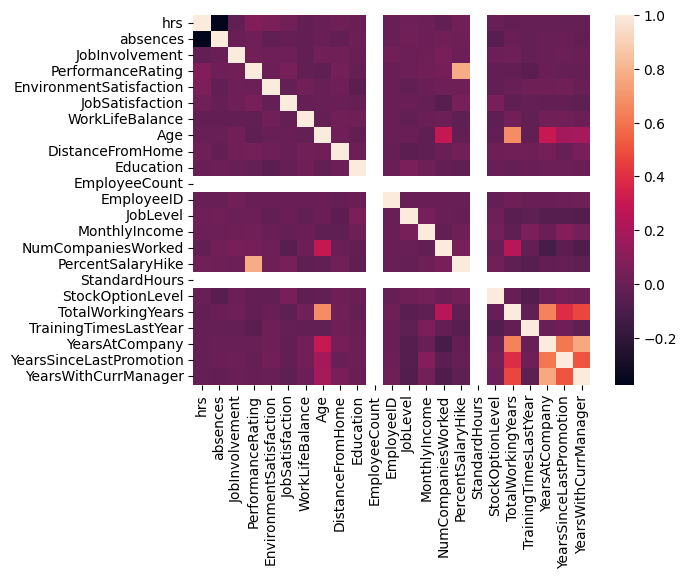

In [7]:
corr_matrix = data.corr()
print("La matriz de correlacion es: \n")
print(corr_matrix)
sea.heatmap(corr_matrix)

Como podemos ver, no todas las columnas que cuenta la base de datos están incluidas en esta matriz. La razón de ello es que automáticamente se han excluido las que son strings ya que no tendría sentido incluirlas. Existe la opción de realizar a estas alturas de la práctica la conversión de string a enteros pero creemos que por la simplicidad necesaria de este EDA y por organizar mejor la práctica no lo haremos todavía.

Si echamos un vistazo a la gráfica, podemos ver que exceptuando casos muy resaltados de correlación 1 que muestran que son variables que dependen completamente unas de las otras de forma directa (color blanco y similares), el color predominante es el morado. Este color en este tono, según la leyenda de la gráfica, consiste en correlación 0 o ligeramente negativa lo que nos indica que realmente los atributos que utilizaremos en esta práctica son bastante independientes unos de los otros y de depender algo, normalmente el aumento en el valor de una provocará un ligerísimo descenso en la otra.

El caso de correlación más negativa es el de las variables "hrs" y "absences" lo cual tiene sentido que ocurra pues, cuantas más horas de trabajo tengas, menos faltas de asistencia tendrás.

Ahora que hemos concluido el EDA, toca analizar una de las carácterísticas más importantes propias de los problemas de clasificación como este que estamos tratando. Se trata de el desbalanceamiento. Para comprobar si los datos están desbalanceados debemos separar los valores de "Attrition" según si son positivos ("Yes") o negativos ("No").

In [8]:
num_pos = data['Attrition'].value_counts()['Yes']
num_neg = data['Attrition'].value_counts()['No']

print("El numero de positivos es: {}".format(num_pos))
print("El numero de negativos es: {}".format(num_neg))

El numero de positivos es: 711
El numero de negativos es: 3699


Queda claro al ver los resultados que la diferencia entre datos positivos y negativos es bastante considerable. Esto significa que los datos no están balanceados y tenemos que tener cuidado a la hora de separar los datos y por ello debemos recurrir a técnicas que nos permitan tratar este problema y evitar que el modelo se decante por la clase mayoritaria siempre.

Importamos lo necesario para tratar con sklearn.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

Para comprobar que los datos efectivamente no se dividen de forma igualitaria, vamos a separar primero la salida ("Attrition") de los datos y posteriormente cambiar las strings del mismo por números enteros.


Modificamos la columna de salida de los valores Yes/No a 1/0 para poder sacar los porcentajes de instancias.

In [10]:
# Separamos Attrition del resto de variables
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Creamos un diccionario para mapear yes/no a 1/0
mapD = {"Yes": 1, "No": 0}

# Lo usamos para mapear Attrition
y = y.map(mapD)

Ahora que tenemos la salida lista, vamos a separar primero los datos en train y test de forma normal para comprobar si debemos aplicar alguna estratificación por el desbalanceo.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

A continuación comprobamos cómo están distribuidas las clases.

In [12]:
total_positivas = num_pos / (num_pos + num_neg)
train_positivas = np.sum(y_train) / len(y_train)
test_positivas = np.sum(y_test) / len(y_test)
print("[TOTAL]: Porcentaje de instancias positivas: {} %".format(total_positivas*100))
print("[TRAIN]: Porcentaje de instancias positivas: {} %".format(train_positivas*100))
print("[TEST]: Porcentaje de instancias positivas: {} %".format(test_positivas*100))

[TOTAL]: Porcentaje de instancias positivas: 16.122448979591837 %
[TRAIN]: Porcentaje de instancias positivas: 16.04308390022676 %
[TEST]: Porcentaje de instancias positivas: 16.439909297052154 %


Como podemos ver, los valores no son iguales lo que significa que a continuación deberemos volver a crear train y test pero con una división estratificada de los datos.

In [13]:
# Hacemos la división estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=21)

# Volvemos a calcular los valores
total_positivas = num_pos / (num_pos + num_neg)
train_positivas = np.sum(y_train) / len(y_train)
test_positivas = np.sum(y_test) / len(y_test)

print("[TOTAL]: Porcentaje de instancias positivas: {} %".format(total_positivas*100))
print("[TRAIN]: Porcentaje de instancias positivas: {} %".format(train_positivas*100))
print("[TEST]: Porcentaje de instancias positivas: {} %".format(test_positivas*100))

[TOTAL]: Porcentaje de instancias positivas: 16.122448979591837 %
[TRAIN]: Porcentaje de instancias positivas: 16.1281179138322 %
[TEST]: Porcentaje de instancias positivas: 16.099773242630384 %


Al hacer la división de esta manera vemos que los porcentajes son casi iguales.

La última parte del proceso de estratificación es un proceso de validación cruzada con StratifiedKFold.

In [14]:
# Usaremos 4 pliegues
cv = StratifiedKFold(n_splits=10)
n_fold = 1

for train_ix, test_ix in cv.split(X_train, y_train):

    y_train_train = y_train.iloc[train_ix]
    y_train_test = y_train.iloc[test_ix]

    train_train_positivas = np.sum(y_train_train) / len(y_train_train)
    train_test_positivas = np.sum(y_train_test) / len(y_train_test)

    print("FOLD {}:".format(n_fold))
    print("[TRAIN TRAIN]: Porcentaje de entradas positivas: {}".format(100 * train_train_positivas))
    print("[TRAIN TEST]: Porcentaje de entradas positivas: {}\n".format(100 * train_test_positivas))

    n_fold += 1

FOLD 1:
[TRAIN TRAIN]: Porcentaje de entradas positivas: 16.125984251968504
[TRAIN TEST]: Porcentaje de entradas positivas: 16.147308781869686

FOLD 2:
[TRAIN TRAIN]: Porcentaje de entradas positivas: 16.125984251968504
[TRAIN TEST]: Porcentaje de entradas positivas: 16.147308781869686

FOLD 3:
[TRAIN TRAIN]: Porcentaje de entradas positivas: 16.125984251968504
[TRAIN TEST]: Porcentaje de entradas positivas: 16.147308781869686

FOLD 4:
[TRAIN TRAIN]: Porcentaje de entradas positivas: 16.125984251968504
[TRAIN TEST]: Porcentaje de entradas positivas: 16.147308781869686

FOLD 5:
[TRAIN TRAIN]: Porcentaje de entradas positivas: 16.125984251968504
[TRAIN TEST]: Porcentaje de entradas positivas: 16.147308781869686

FOLD 6:
[TRAIN TRAIN]: Porcentaje de entradas positivas: 16.125984251968504
[TRAIN TEST]: Porcentaje de entradas positivas: 16.147308781869686

FOLD 7:
[TRAIN TRAIN]: Porcentaje de entradas positivas: 16.125984251968504
[TRAIN TEST]: Porcentaje de entradas positivas: 16.147308781

Aunque los porcentajes no son exactamente igual, podemos ver que son muy similares.

El siguiente paso de la práctica es construir los modelos. El primero que se pide es el de LogisticRegression.

In [15]:
# Creamos el OneHotEncoder para las variables categóricas
string_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

procesador = ColumnTransformer(
    transformers=[
        ('cat', string_transformer, ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18'])
    ])
    
np.random.seed(21)

# Creamos el Pipeline es importante poner class_weight = "balanced" para que tenga en cuenta el desbalanceo
pipeline = Pipeline(steps=[('preprocessor', procesador),
                           ('classifier', LogisticRegression(class_weight="balanced", random_state=21))])

# Entrenamos el modelo
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=21))])

In [16]:
# Hacemos predicciones
y_pred = pipeline.predict(X_test)

# Calculamos las métricas pedidas en el enunciado
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("[LOGISTIC REGRESSION]: La BALANCED_ACCURACCY es: {}".format(balanced_acc))
print("[LOGISTIC REGRESSION]: La F1_SCORE es: {}".format(f1))
print("[LOGISTIC REGRESSION]: La MATRIZ DE CONFUSIÓN es: {}".format(cm))

resultados["LOGISTIC REGRESSION"] = [balanced_acc, f1, cm]


[LOGISTIC REGRESSION]: La BALANCED_ACCURACCY es: 0.6137704606014465
[LOGISTIC REGRESSION]: La F1_SCORE es: 0.3385214007782101
[LOGISTIC REGRESSION]: La MATRIZ DE CONFUSIÓN es: [[455 285]
 [ 55  87]]


Los resultados obtenidos con este método no son muy buenos ya que solo son ligeramente mejores que el azar. 

El siguiente método pedido es un método de Boosting a elegir. Existe la opción de utilizar los de sklearn, sin embargo, ya que hay una bonificación en la nota por utilizar librerías externas, vamos aprobar a utilizar XGBClassifier de la librería xgboost. Primero usaremos el modelo sin ajustar hiperparámetros para compararlo con el que sí después.

In [17]:
# Usaremos la librería lightgbm para entrenar un modelo de boosting
from lightgbm import LGBMClassifier

# Creamos los transformadores con OneHotEncoder
string_transformer_boost = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

procesador_boost = ColumnTransformer(
    transformers=[
        ('cat', string_transformer_boost, ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']), # columnas con datos categóricos
    ])

# Usaremos un StratifiedKFold 
cv = StratifiedKFold(n_splits=5)

# Construimos el pipeline
pipeline_boost = Pipeline(steps=[('preprocessor', procesador_boost),
                           ('classifier', LGBMClassifier(random_state=21))])

# Entrenamos el modelo
pipeline_boost.fit(X_train, y_train)

# Hacemos predicciones
y_pred = pipeline_boost.predict(X_test)

# Calculamos las métricas pedidas en el enunciado
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("[BOOSTING LIGHTGBM]: La BALANCED_ACCURACCY es: {}".format(balanced_acc))
print("[BOOSTING LIGHTGBM]: La F1_SCORE es: {}".format(f1))
print("[BOOSTING LIGHTGBM]: La MATRIZ DE CONFUSIÓN es: {}".format(cm))

resultados["BOOSTING LIGHTGBM"] = [balanced_acc, f1, cm]

[BOOSTING LIGHTGBM]: La BALANCED_ACCURACCY es: 0.5403692424819185
[BOOSTING LIGHTGBM]: La F1_SCORE es: 0.15950920245398773
[BOOSTING LIGHTGBM]: La MATRIZ DE CONFUSIÓN es: [[732   8]
 [129  13]]


Ahora lo hacemos de nuevo ajustando hiperparámetros.

In [18]:
from lightgbm import LGBMClassifier

# Variable para tratar el desbalanceo
weight = num_neg / num_pos

# Creamos los tranformadores con OneHotEncoder
string_transformer_boost = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

procesador_boost = ColumnTransformer(
    transformers=[
        ('cat', string_transformer_boost, ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']), # columnas con datos categóricos
    ])

# Construimos el pipeline
pipeline_boost = Pipeline(steps=[('preprocessor', procesador_boost),
                           ('classifier', LGBMClassifier(is_unbalance=True, random_state=21))])

# Creamos diccionario con los parámetros que usaremos en el GridSearch
param_grid = {
    'classifier__learning_rate': [0.1, 0.4], # 0.1
    'classifier__max_depth': [-1, 10], # -1
    'classifier__n_estimators': [100, 110], # 100
    'classifier__num_leaves': [31, 91], # 31
    'classifier__min_child_samples': [10, 20], # 20
    'classifier__subsample': [0.1, 1], # 1
}

# Usaremos un StratifiedKFold como cv para el balanceo
cv_STR = StratifiedKFold(n_splits=5)

# Creamos el GridSearch
grid_search = GridSearchCV(pipeline_boost, param_grid=param_grid, cv=cv_STR, n_jobs=-1, scoring='balanced_accuracy')

# Entrenamos el modelo
grid_search.fit(X_train, y_train)

# Parámetros obtenidos
grid_search.best_params_, -grid_search.best_score_

({'classifier__learning_rate': 0.1,
  'classifier__max_depth': -1,
  'classifier__min_child_samples': 10,
  'classifier__n_estimators': 100,
  'classifier__num_leaves': 31,
  'classifier__subsample': 0.1},
 -0.638475881279912)

Por último comprobamos si el modelo que hemos obtenido ha mejorado haciendo las predicciones y calculando las métricas pedidas.

In [19]:
# Hacemos predicciones
y_pred = grid_search.predict(X_test)

# Calculamos las métricas pedidas en el enunciado
balanced_acc_boost = balanced_accuracy_score(y_test, y_pred)
f1_boost = f1_score(y_test, y_pred)
cm_boost = confusion_matrix(y_test, y_pred)

print("[BOOSTING LIGHTGBM MODIFICADO]: La BALANCED_ACCURACCY es: {}".format(balanced_acc_boost))
print("[BOOSTING LIGHTGBM MODIFICADO]: La F1_SCORE es: {}".format(f1_boost))
print("[BOOSTING LIGHTGBM MODIFICADO]: La MATRIZ DE CONFUSIÓN es: {}".format(cm_boost))

resultados["BOOSTING LIGHTGBM MODIFICADO"] = [balanced_acc_boost, f1_boost, cm_boost]

[BOOSTING LIGHTGBM MODIFICADO]: La BALANCED_ACCURACCY es: 0.6545964979063571
[BOOSTING LIGHTGBM MODIFICADO]: La F1_SCORE es: 0.38197424892703863
[BOOSTING LIGHTGBM MODIFICADO]: La MATRIZ DE CONFUSIÓN es: [[505 235]
 [ 53  89]]


Ahora que tenemos todos los modelos, vamos a imprimir los valores obtenidos todos juntos para hacer comparaciones.

In [20]:
# LOGISTIC REGRESSION
print("[LOGISTIC REGRESSION]: La BALANCED_ACCURACCY es: {}".format(resultados["LOGISTIC REGRESSION"][0]))
print("[LOGISTIC REGRESSION]: La F1_SCORE es: {}".format(resultados["LOGISTIC REGRESSION"][1]))
print("[LOGISTIC REGRESSION]: La MATRIZ DE CONFUSIÓN es: {}".format(resultados["LOGISTIC REGRESSION"][2]))
print("---------------------------------------------------------------")
# BOOSTING XGBOOST
print("[BOOSTING LIGHTGBM]: La BALANCED_ACCURACCY es: {}".format(resultados["BOOSTING LIGHTGBM"][0]))
print("[BOOSTING LIGHTGBM]: La F1_SCORE es: {}".format(resultados["BOOSTING LIGHTGBM"][1]))
print("[BOOSTING LIGHTGBM]: La MATRIZ DE CONFUSIÓN es: {}".format(resultados["BOOSTING LIGHTGBM"][2]))
print("---------------------------------------------------------------")
# BOOSTING XGBOOST MODIFIED
print("[BOOSTING LIGHTGBM MODIFICADO]: La BALANCED_ACCURACCY es: {}".format(resultados["BOOSTING LIGHTGBM MODIFICADO"][0]))
print("[BOOSTING LIGHTGBM MODIFICADO]: La F1_SCORE es: {}".format(resultados["BOOSTING LIGHTGBM MODIFICADO"][1]))
print("[BOOSTING LIGHTGBM MODIFICADO]: La MATRIZ DE CONFUSIÓN es: {}".format(resultados["BOOSTING LIGHTGBM MODIFICADO"][2]))

[LOGISTIC REGRESSION]: La BALANCED_ACCURACCY es: 0.6137704606014465
[LOGISTIC REGRESSION]: La F1_SCORE es: 0.3385214007782101
[LOGISTIC REGRESSION]: La MATRIZ DE CONFUSIÓN es: [[455 285]
 [ 55  87]]
---------------------------------------------------------------
[BOOSTING LIGHTGBM]: La BALANCED_ACCURACCY es: 0.5403692424819185
[BOOSTING LIGHTGBM]: La F1_SCORE es: 0.15950920245398773
[BOOSTING LIGHTGBM]: La MATRIZ DE CONFUSIÓN es: [[732   8]
 [129  13]]
---------------------------------------------------------------
[BOOSTING LIGHTGBM MODIFICADO]: La BALANCED_ACCURACCY es: 0.6545964979063571
[BOOSTING LIGHTGBM MODIFICADO]: La F1_SCORE es: 0.38197424892703863
[BOOSTING LIGHTGBM MODIFICADO]: La MATRIZ DE CONFUSIÓN es: [[505 235]
 [ 53  89]]


Como podemos ver, aunque de forma no muy significativa, el método de boosting con ajuste de hiperparámetros ha resultado ser mejor que el Logistic Regression y por tanto el modelo óptimo.

Para completar la práctica, debemos tratar de eliminar atributos de nuestros datos sin empeorar los resultados. Para ello usaremos primero el método Logistic Regression y le aplicaremos un selector para saber el número de atributos óptimo.

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Creamos los tranformadores con OneHotEncoder
string_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

procesador = ColumnTransformer(
    transformers=[
        ('cat', string_transformer, ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']), # columnas con datos categóricos
    ])

# Creamos el selector, scaler y el modelo
selector = SelectKBest(f_classif)
scaler = StandardScaler(with_mean=False)
lg = LogisticRegression(class_weight="balanced", random_state=21)


# Creamos el pipeline
pipeline_attr = Pipeline([
  ('procesador', procesador),
  ('scaler', scaler),
  ('select', selector),
  ('lg', lg)                     
])

# Creamos el grid de parámetros
param_grid = {'select__k': list(range(1,31))}

# Usaremos un StratifiedKFold como cv para el balanceo
cv_STR = StratifiedKFold(n_splits=5)

# Creamos el objeto GridSearchCV
opt_atr = GridSearchCV(pipeline_attr, param_grid, scoring="f1", cv=cv_STR, n_jobs=-1)
                       
# Entrenamos el modelo y mostramos el número de features seleccionadas como óptimas   
opt_atr.fit(X_train, y_train)
opt_atr.best_params_

{'select__k': 12}

Ya que han salido 12 como los mejores, ajustamos el selector a 12.

In [22]:
# Se eligen los 12 mejores atributos
selector = SelectKBest(f_classif, k=12)
scaler = StandardScaler(with_mean=False)
lg = LogisticRegression(class_weight="balanced", random_state=21)

# Creamos el pipeline
pipe = Pipeline([
  ('procesador', procesador),
  ('scale', scaler),
  ('select', selector),
  ('lg', lg)                     
])

#Entrenamos el modelo y se muestran los resultados
pipe.fit(X_train, y_train)

Pipeline(steps=[('procesador',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18'])])),
                ('scale', StandardScaler(with_mean=False)),
                ('select', SelectKBest(k=12)),
                ('lg',
                 LogisticRegression(class_weight='balanced', random_state=21))])

Mostramos los resultados:

In [23]:
# Imprime si el atributo ha sido seleccionado o no con True o False
print("Atributos seleccionados:")
print(pipe.named_steps['select'].get_support())
print("----------------------------------------------------------------------------------")

# Posición atributos
print("Posición de los atributos en la tabla")
print(np.where(pipe.named_steps['select'].get_support()))
print("----------------------------------------------------------------------------------")

# Nombres atributos
print("Los nombres de los atributos son:")
atr = selector.get_support()
nombres_atributos = np.array(list(X_train.columns)).tolist()

nombres_variables_seleccionadas = [nombre for i, nombre in enumerate(nombres_atributos) if atr[i]]
print(nombres_variables_seleccionadas)
print(len(nombres_variables_seleccionadas))

Atributos seleccionados:
[ True  True  True  True False False False  True False False False False
  True False False False False False False False False  True  True  True
 False False False  True  True  True False False False]
----------------------------------------------------------------------------------
Posición de los atributos en la tabla
(array([ 0,  1,  2,  3,  7, 12, 21, 22, 23, 27, 28, 29], dtype=int64),)
----------------------------------------------------------------------------------
Los nombres de los atributos son:
['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'Age', 'EducationField', 'Over18', 'PercentSalaryHike', 'StandardHours', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
12


Por último evaluamos las métricas de este modelo.

In [24]:
# Hacemos predicciones
y_pred = pipe.predict(X_test)

# Calculamos las métricas pedidas en el enunciado
balanced_acc_boost = balanced_accuracy_score(y_test, y_pred)
f1_boost = f1_score(y_test, y_pred)
cm_boost = confusion_matrix(y_test, y_pred)

print("[LOGISTIC REGRESSION REDUCIDO]: La BALANCED_ACCURACCY es: {}".format(balanced_acc_boost))
print("[LOGISTIC REGRESSION REDUCIDO]: La F1_SCORE es: {}".format(f1_boost))
print("[LOGISTIC REGRESSION REDUCIDO]: La MATRIZ DE CONFUSIÓN es: {}".format(cm_boost))

resultados["LOGISTIC REGRESSION REDUCIDO"] = [balanced_acc_boost, f1_boost, cm_boost]

[LOGISTIC REGRESSION REDUCIDO]: La BALANCED_ACCURACCY es: 0.6236200989722116
[LOGISTIC REGRESSION REDUCIDO]: La F1_SCORE es: 0.3490759753593429
[LOGISTIC REGRESSION REDUCIDO]: La MATRIZ DE CONFUSIÓN es: [[480 260]
 [ 57  85]]


Ahora probaremos a hacer lo mismo con el método boosting.

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Creamos los tranformadores con OneHotEncoder
string_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

procesador = ColumnTransformer(
    transformers=[
        ('cat', string_transformer, ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']), # columnas con datos categóricos
    ])

# Creamos el selector, scaler y el modelo
selector = SelectKBest(f_classif)
scaler = StandardScaler(with_mean=False)
lg = LGBMClassifier(is_unbalance=True, random_state=21)


# Creamos el pipeline
pipeline_attr = Pipeline([
  ('procesador', procesador),
  ('scaler', scaler),
  ('select', selector),
  ('lg', lg)                     
])

# Creamos el grid de parámetros
param_grid = {
    'select__k': list(range(1,31)),
    #'lg__learning_rate': [0.1, 0.4], # Default 0.1 - COMENTADO YA QUE SALE EL DEFAULT (PARA AHORRAR TIEMPO)
    'lg__max_depth': [-1, 10], # -1
    'lg__n_estimators': [100, 150], # 100
    'lg__min_child_samples': [10, 20], # 20
    'lg__subsample': [0.1, 1], # 1
}

# Usaremos un StratifiedKFold como cv para el balanceo
cv_STR = StratifiedKFold(n_splits=5)

# Creamos el objeto GridSearchCV
opt_atr = GridSearchCV(pipeline_attr, param_grid, scoring="f1", cv=cv_STR, n_jobs=-1)
                       
# Entrenamos el modelo y mostramos el número de features seleccionadas como óptimas   
opt_atr.fit(X_train, y_train)
opt_atr.best_params_

{'lg__max_depth': 10,
 'lg__min_child_samples': 10,
 'lg__n_estimators': 150,
 'lg__subsample': 0.1,
 'select__k': 23}

En este caso se escogieron 23 atributos.

In [26]:
# Se eligen los 22 mejores atributos
selector = SelectKBest(f_classif, k=23)
scaler = StandardScaler(with_mean=False)
lg = LGBMClassifier(**opt_atr.best_params_, class_weight="balanced", random_state=21)

# Creamos el pipeline
pipe = Pipeline([
  ('procesador', procesador),
  ('scale', scaler),
  ('select', selector),
  ('lg', lg)                     
])

#Entrenamos el modelo y se muestran los resultados
pipe.fit(X_train, y_train)

Pipeline(steps=[('procesador',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'Over18'])])),
                ('scale', StandardScaler(with_mean=False)),
                ('select', SelectKBest(k=23)),
                ('lg',
                 LGBMClassifier(class_weight='balanced', lg__max_depth=10,
                                lg__min_child_samples=10, lg__n_estimators=150,
                                lg__subsample=0.1, random_state=21,
                                select__k=23))])

In [27]:
# Imprime si el atributo ha sido seleccionado o no con True o False
print("Atributos seleccionados:")
print(pipe.named_steps['select'].get_support())
print("----------------------------------------------------------------------------------")

# Posición atributos
print("Posición de los atributos en la tabla")
print(np.where(pipe.named_steps['select'].get_support()))
print("----------------------------------------------------------------------------------")

# Nombres atributos
print("Los nombres de los atributos son:")
atr = selector.get_support()
nombres_atributos = np.array(list(X_train.columns)).tolist()

nombres_variables_seleccionadas = [nombre for i, nombre in enumerate(nombres_atributos) if atr[i]]
print(nombres_variables_seleccionadas)
print(len(nombres_variables_seleccionadas))

Atributos seleccionados:
[ True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True False False False  True  True  True  True  True
 False False  True  True  True  True False False False]
----------------------------------------------------------------------------------
Posición de los atributos en la tabla
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 14, 15, 19, 20, 21,
       22, 23, 26, 27, 28, 29], dtype=int64),)
----------------------------------------------------------------------------------
Los nombres de los atributos son:
['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EmployeeID', 'Gender', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
23


Hacemos las predicciones e imprimimos resultados.

In [28]:
# Hacemos predicciones
y_pred = pipe.predict(X_test)

# Calculamos las métricas pedidas en el enunciado
balanced_acc_boost = balanced_accuracy_score(y_test, y_pred)
f1_boost = f1_score(y_test, y_pred)
cm_boost = confusion_matrix(y_test, y_pred)

print("[BOOSTING LIGHTGBM REDUCIDO]: La BALANCED_ACCURACCY es: {}".format(balanced_acc_boost))
print("[BOOSTING LIGHTGBM REDUCIDO]: La F1_SCORE es: {}".format(f1_boost))
print("[BOOSTING LIGHTGBM REDUCIDO]: La MATRIZ DE CONFUSIÓN es: {}".format(cm_boost))

resultados["BOOSTING LIGHTGBM REDUCIDO"] = [balanced_acc_boost, f1_boost, cm_boost]

[BOOSTING LIGHTGBM REDUCIDO]: La BALANCED_ACCURACCY es: 0.6494765892653217
[BOOSTING LIGHTGBM REDUCIDO]: La F1_SCORE es: 0.374485596707819
[BOOSTING LIGHTGBM REDUCIDO]: La MATRIZ DE CONFUSIÓN es: [[487 253]
 [ 51  91]]


Para terminar vamos a imprimir los resultados obtenidos y compararlos con los anteriores.

In [29]:
# LOGISTIC REGRESSION
print("[LOGISTIC REGRESSION]: La BALANCED_ACCURACCY es: {}".format(resultados["LOGISTIC REGRESSION"][0]))
print("[LOGISTIC REGRESSION]: La F1_SCORE es: {}".format(resultados["LOGISTIC REGRESSION"][1]))
print("[LOGISTIC REGRESSION]: La MATRIZ DE CONFUSIÓN es: {}\n".format(resultados["LOGISTIC REGRESSION"][2]))

print("[LOGISTIC REGRESSION REDUCIDO]: La BALANCED_ACCURACCY es: {}".format(resultados["LOGISTIC REGRESSION REDUCIDO"][0]))
print("[LOGISTIC REGRESSION REDUCIDO]: La F1_SCORE es: {}".format(resultados["LOGISTIC REGRESSION REDUCIDO"][1]))
print("[LOGISTIC REGRESSION REDUCIDO]: La MATRIZ DE CONFUSIÓN es: {}\n".format(resultados["LOGISTIC REGRESSION REDUCIDO"][2]))

print("---------------------------------------------------------------")

# BOOSTING LIGHGBM
print("[BOOSTING LIGHTGBM]: La BALANCED_ACCURACCY es: {}".format(resultados["BOOSTING LIGHTGBM"][0]))
print("[BOOSTING LIGHTGBM]: La F1_SCORE es: {}".format(resultados["BOOSTING LIGHTGBM"][1]))
print("[BOOSTING LIGHTGBM]: La MATRIZ DE CONFUSIÓN es: {}\n".format(resultados["BOOSTING LIGHTGBM"][2]))

print("[BOOSTING LIGHTGBM MODIFICADO]: La BALANCED_ACCURACCY es: {}".format(resultados["BOOSTING LIGHTGBM MODIFICADO"][0]))
print("[BOOSTING LIGHTGBM MODIFICADO]: La F1_SCORE es: {}".format(resultados["BOOSTING LIGHTGBM MODIFICADO"][1]))
print("[BOOSTING LIGHTGBM MODIFICADO]: La MATRIZ DE CONFUSIÓN es: {}\n".format(resultados["BOOSTING LIGHTGBM MODIFICADO"][2]))

print("[BOOSTING LIGHTGBM REDUCIDO]: La BALANCED_ACCURACCY es: {}".format(resultados["BOOSTING LIGHTGBM REDUCIDO"][0]))
print("[BOOSTING LIGHTGBM REDUCIDO]: La F1_SCORE es: {}".format(resultados["BOOSTING LIGHTGBM REDUCIDO"][1]))
print("[BOOSTING LIGHTGBM REDUCIDO]: La MATRIZ DE CONFUSIÓN es: {}\n".format(resultados["BOOSTING LIGHTGBM REDUCIDO"][2]))

[LOGISTIC REGRESSION]: La BALANCED_ACCURACCY es: 0.6137704606014465
[LOGISTIC REGRESSION]: La F1_SCORE es: 0.3385214007782101
[LOGISTIC REGRESSION]: La MATRIZ DE CONFUSIÓN es: [[455 285]
 [ 55  87]]

[LOGISTIC REGRESSION REDUCIDO]: La BALANCED_ACCURACCY es: 0.6236200989722116
[LOGISTIC REGRESSION REDUCIDO]: La F1_SCORE es: 0.3490759753593429
[LOGISTIC REGRESSION REDUCIDO]: La MATRIZ DE CONFUSIÓN es: [[480 260]
 [ 57  85]]

---------------------------------------------------------------
[BOOSTING LIGHTGBM]: La BALANCED_ACCURACCY es: 0.5403692424819185
[BOOSTING LIGHTGBM]: La F1_SCORE es: 0.15950920245398773
[BOOSTING LIGHTGBM]: La MATRIZ DE CONFUSIÓN es: [[732   8]
 [129  13]]

[BOOSTING LIGHTGBM MODIFICADO]: La BALANCED_ACCURACCY es: 0.6545964979063571
[BOOSTING LIGHTGBM MODIFICADO]: La F1_SCORE es: 0.38197424892703863
[BOOSTING LIGHTGBM MODIFICADO]: La MATRIZ DE CONFUSIÓN es: [[505 235]
 [ 53  89]]

[BOOSTING LIGHTGBM REDUCIDO]: La BALANCED_ACCURACCY es: 0.6494765892653217
[BOOSTING L

Como podemos ver, en el caso del Logistic Regression, el modelo ha mejorado tras la reducción de atributos. Sin embargo, esto no ha hecho que pase a ser mejor que el método de LightGBM que sigue siendo el ideal a pesar de haber empeorado (muy ligeramente) al reducir parámetros.

A continuación vamos a representar estos datos de una forma gráfica para que sea más visual. Se representaran las métricas balanced accuracy y f1 pues la matriz no se podría mostrar de esta forma.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


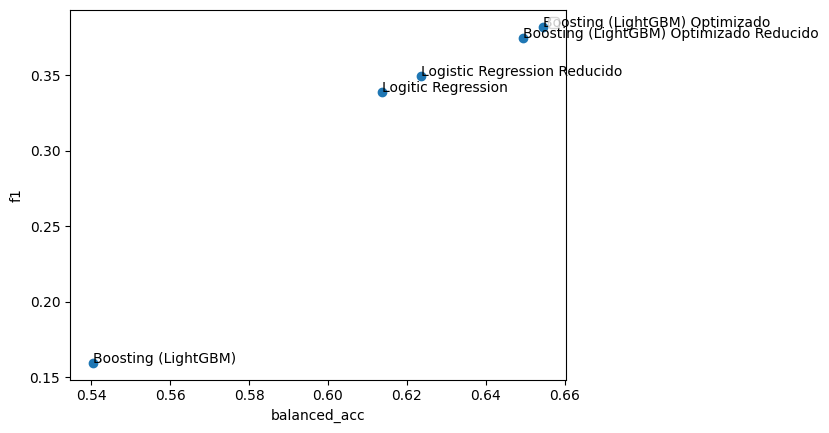

In [30]:
# Separamos los resultados de las métricas
balanced_acc = [resultados["LOGISTIC REGRESSION"][0], resultados["LOGISTIC REGRESSION REDUCIDO"][0], resultados["BOOSTING LIGHTGBM"][0], resultados["BOOSTING LIGHTGBM MODIFICADO"][0], resultados["BOOSTING LIGHTGBM REDUCIDO"][0]]
f1 = [resultados["LOGISTIC REGRESSION"][1], resultados["LOGISTIC REGRESSION REDUCIDO"][1], resultados["BOOSTING LIGHTGBM"][1], resultados["BOOSTING LIGHTGBM MODIFICADO"][1], resultados["BOOSTING LIGHTGBM REDUCIDO"][1]]

# Creamos una lista con los nombres de los modelos para la leyenda
modelos = ['Logitic Regression', 'Logistic Regression Reducido', 'Boosting (LightGBM)', 'Boosting (LightGBM) Optimizado', 'Boosting (LightGBM) Optimizado Reducido']

# Creamos un gráfico de dispersión con las métricas y ajustamos la leyenda
plt.scatter(balanced_acc, f1)
for i, modelo in enumerate(modelos):
    plt.annotate(modelo, (balanced_acc[i], f1[i]))
plt.legend()

# Nombramos los ejes
plt.xlabel('balanced_acc')
plt.ylabel('f1')

# Mostramos el gráfico
plt.show()


En el gráfico que se devuelve, en el que un modelo es mejor cuanto más a la derecha y más arriba se encuentre, se puede ver claramente la inferioridad del método de boosting cuando no se ajustan los hiperparámetros. Sin embargo, al ajustarse, este pasa a ser el mejor método. Si nos fijamos en los casos de parámetros reducidos, se ve fácilmente la mejora en el caso del logistic regression mientras que los puntos que representan el boosting reducido y optimizado están cerca de sobreponerse.

Por último exportaremos le modelo final. El escogido será el modelo de boosting LighGBM con los atributos reducidos. La razón de escoger este y no el de boosting optimizado por su puntuación más alta es que la diferencia es mínima y el escogido pudo procesar correctamente 1 caso más de clase minoritaria que el otro por lo que a la larga podría ser mejor con otro conjunto de datos al identificar las clase menos común en nuestros datos en mayor medida.

In [32]:
# Creamos los tranformadores con OneHotEncoder
string_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

procesador = ColumnTransformer(
    transformers=[
        ('cat', string_transformer, ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']), # columnas con datos categóricos
    ])

# Creamos el selector, scaler y el modelo
selector = SelectKBest(f_classif, k=23)
scaler = StandardScaler(with_mean=False)
params = {'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 10, 'n_estimators': 150, 'subsample': 0.1, 'k': 23, 'random_state': 21, 'is_unbalance': True}
lg = LGBMClassifier(**params)


# Creamos el pipeline
pipeline_final = Pipeline([
  ('procesador', procesador),
  ('scaler', scaler),
  ('select', selector),
  ('lg', lg)                     
])

# Entrenamos el modelo
pipeline_final.fit(X_train, y_train)

# Exportamos el modelo final a un fichero pickle
with open('modelo_final.pkl', 'wb') as f:
    pickle.dump(pipeline_final, f)